In [10]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt 
import json

**1.DATA COLLECTION**

In [11]:
r"C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\Task2 Dataset"

'C:\\Users\\salam_jmvmbso\\OneDrive\\Desktop\\Coding Raja Technologies Internship\\ML Task2\\Task2 Dataset'

**2.DATA PREPROCESSING**

In [12]:
training_dataset= tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\Task2 Dataset\train",
    label_mode="categorical",
    class_names= None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=+True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
     )

Found 5299 files belonging to 30 classes.


In [13]:
validation_dataset= tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\Task2 Dataset\validation",
    labels="inferred",
    label_mode="categorical",
    class_names= None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=+True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
     )

Found 2636 files belonging to 30 classes.


In [14]:
test_dataset= tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\Task2 Dataset\test",
    labels="inferred",
    label_mode="categorical",
    class_names= None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=+True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
     )

Found 2636 files belonging to 30 classes.


**3.MODEL ARCHITECTURE**

In [15]:
cnn = tf.keras.models.load_model(r'C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\trained_Model.h5')

In [16]:
cnn= tf.keras.models.Sequential()

In [17]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=5, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [21]:
cnn.add(tf.keras.layers.Flatten())

In [22]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**4.TRANSFER LEARNING**  



In [23]:
test_dataset.class_names

['apple_pie',
 'baklava',
 'beef_carpaccio',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'cake',
 'cannoli',
 'ceviche',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'escargots',
 'falafel',
 'filet_mignon',
 'fried_rice',
 'ice_cream',
 'samosa']

In [24]:
cnn.add(tf.keras.layers.Dense(units=30,activation='softmax'))

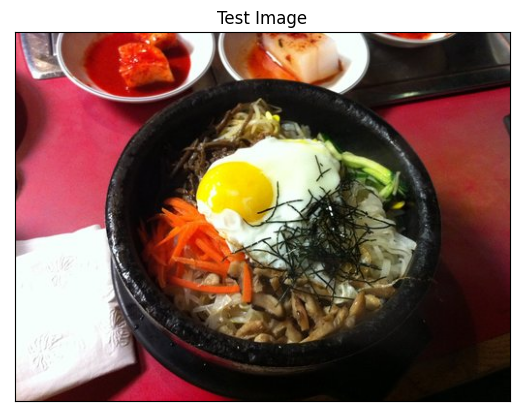

In [44]:
image_path=r"C:\Users\salam_jmvmbso\OneDrive\Desktop\Coding Raja Technologies Internship\ML Task2\Task2 Dataset\test\bibimbap\255065.jpg"
img = cv2.imread(image_path)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title("Test Image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


**5.MODEL TRAINING**

In [26]:
history = cnn.fit(x=training_dataset, validation_data=validation_dataset, epochs=30)
print(history.history)

Epoch 1/2
166/166 [==============================] - 151s 859ms/step - loss: 7.2776 - accuracy: 0.0357 - val_loss: 3.3773 - val_accuracy: 0.0569
Epoch 2/2
166/166 [==============================] - 100s 603ms/step - loss: 3.6915 - accuracy: 0.0455 - val_loss: 15.3316 - val_accuracy: 0.0341
{'loss': [7.277562618255615, 3.6915462017059326], 'accuracy': [0.03566710650920868, 0.04548028111457825], 'val_loss': [3.3772590160369873, 15.331576347351074], 'val_accuracy': [0.05690440163016319, 0.034142639487981796]}


In [45]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 63ms/step


In [46]:
print(prediction)

[[3.9809325e-09 3.2918138e-10 1.2548442e-07 1.1599028e-03 1.0391341e-09
  9.9686289e-01 1.0784562e-07 1.2296478e-03 8.4648683e-08 1.5054272e-10
  1.8254766e-04 1.7310579e-10 4.2838622e-10 5.0238206e-05 2.2411952e-09
  1.1678604e-06 8.6674388e-16 2.7499900e-07 3.8009897e-08 1.2740587e-04
  2.4834464e-04 1.4202154e-11 3.6210278e-11 2.8966075e-05 7.5100245e-11
  1.0830909e-04 3.7744377e-09 3.4150751e-09 3.6825680e-09 5.8245094e-15]]


In [47]:
result_index = np.argmax(prediction)
print(result_index)

5


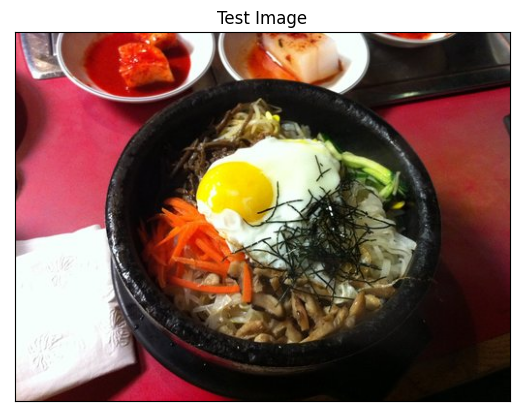

In [48]:
plt.title("Test Image")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

Its a bibimbap 


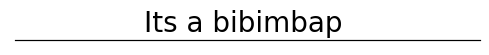

In [49]:
print("Its a {} ".format(test_dataset.class_names[result_index]))
plt.figure(figsize=(6,0.001))
plt.title("Its a {} ".format(test_dataset.class_names[result_index]),fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
cnn.save('trained_Model.h5')

C:\Users\salam_jmvmbso\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
with open('training_list.json', 'w') as file:
    json.dump(history.history,file)

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**6.MODEL EVALUATION**

In [35]:
print('Validation set accuracy : {} %'.format(history.history['val_accuracy'][-1]*100))

Validation set accuracy : 3.4142639487981796 %


**7. VISUALIZATION**

In [ ]:
epochs = [i for i in range(1,31)]
plt.figure(figsize=(4,4))
plt.plot(epochs,history.history["accuracy"],color="green")
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of Training Accuracy",fontsize= 13)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (30,) and (2,)

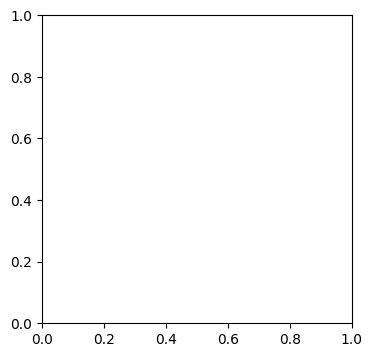

In [51]:
plt.figure(figsize=(4,4))
plt.plot(epochs,history.history["val_accuracy"],color="purple")
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Visualization of Validation Accuracy",fontsize= 13)
plt.show()